# Biomedical Data Bases, 2020-2021
### Introduction to databases
These are the notes by prof. Davide Salomoni (d.salomoni@unibo.it) for the Biomedical Data Base course at the University of Bologna, academic year 2020-2021.

## Read CSV data into a Pandas data frame
Import pandas, then use _read_csv()_ to create the data frame and print its columns.
<br>
Click on Run in Jupyter to execute the cell.

In [1]:
import pandas as pd
df = pd.read_csv("COVID-19-sample-BDB2021.csv")
print(df.columns)

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')


## Print out the the first rows of the data frame
Use _head()_

In [2]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,07/12/2020,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
1,06/12/2020,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
2,05/12/2020,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865
3,04/12/2020,4,12,2020,119,5,Afghanistan,AF,AFG,38041757.0,Asia,7.107979
4,03/12/2020,3,12,2020,202,19,Afghanistan,AF,AFG,38041757.0,Asia,7.536455


## Read a filtered version of the original data
Define which columns you want to read and then call _read_csv()_ with the _usecols_ argument

In [3]:
cols = ["month", "year", "cases", "geoId"]
df = pd.read_csv("COVID-19-sample-BDB2021.csv", usecols=cols)
df.head()

,month,year,cases,geoId
0,12,2020,210,AF
1,12,2020,234,AF
2,12,2020,235,AF
3,12,2020,119,AF
4,12,2020,202,AF


## How big is it?
Check with the _shape_ and _size_ characteristics of the data frame

In [5]:
print(df.shape)
print(df.size)

(60409, 4)
241636


## Find rows
Find all the COVID-19 cases reported in Italy in the month of July 2020

In [11]:
ncases = 0
for i, row in df.iterrows():
  id = row["geoId"]
  month = row["month"]
  year = row["year"]
  if (id=="IT") and (month==7) and (year==2020):
    ncases += row["cases"]

print(ncases)

6722


And in November 2020? Just copy the cell above and change the query within the _if_ statement

In [6]:
ncases = 0
for i, row in df.iterrows():
  id = row["geoId"]
  month = row["month"]
  year = row["year"]
  if (id=="IT") and (month==11) and (year==2020):
    ncases += row["cases"]

print(ncases)

937504


## Read an .xlsx file instead of a .csv file
All it takes is to replace _read_csv()_ with _read_excel()_.
<br>
The algorithm operating on the pandas data frame remains the same.

In [7]:
df2 = pd.read_excel("COVID-19-sample-BDB2021.xlsx", usecols=cols)
ncases = 0
for i, row in df2.iterrows():
  id = row["geoId"]
  month = row["month"]
  year = row["year"]
  if (id=="IT") and (month==11) and (year==2020):
    ncases += row["cases"]

print(ncases)

937504


## Use pandas built-in functions
The usage of pandas built-in functions typically simplifies and speeds up things.
<br>
Here we use the _query()_ and _sum()_ functions.

In [8]:
small_df = df.query('geoId=="IT" & month==11 & year==2020')
print(small_df['cases'].sum())

937504


### Is it faster?
Let's check with _time.time()_ and take the average of a few runs.

In [9]:
import time
from statistics import mean, stdev

t1 = []
for i in range(5):
    t1_start = time.time()
    df = pd.read_csv("COVID-19-sample-BDB2021.csv")
    ncases_1 = 0
    for i, row in df.iterrows():
      id = row["geoId"]
      month = row["month"]
      year = row["year"]
      if (id=="IT") and (month==11) and (year==2020):
        ncases_1 += row["cases"]
    t1_end = time.time()
    t1.append(t1_end - t1_start)

t2 = []
for i in range(5):
    t2_start = time.time()
    df = pd.read_csv("COVID-19-sample-BDB2021.csv")
    small_df = df.query('geoId=="IT" & month==11 & year==2020')
    ncases_2 = small_df['cases'].sum()
    t2_end = time.time()
    t2.append(t2_end - t2_start)

t1_avg, t1_stdev = mean(t1), stdev(t1)
t2_avg, t2_stdev = mean(t2), stdev(t2)
print("Brute force method: %.2f seconds, stdev=%.2f seconds" % (t1_avg, t1_stdev))
print("Pandas-friendly method: %.2f seconds, stdev=%.2f seconds" % (t2_avg, t2_stdev))
print("Speed-up: %.2f times" % (t1_avg/t2_avg))

Brute force method: 7.19 seconds, stdev=0.80 seconds
Pandas-friendly method: 0.13 seconds, stdev=0.02 seconds
Speed-up: 56.68 times


## We could also use the python csv module
Do you think it will be faster or slower than pandas?

In [10]:
import csv

ncases = 0
with open("COVID-19-sample-BDB2021.csv", mode="r") as csv_file:
  csv_reader = csv.DictReader(csv_file)
  for row in csv_reader:
    if (row['geoId']=="IT") and (int(row['month'])==11) and (int(row['year'])==2020):
      ncases += int(row['cases'])

print(ncases)

937504


## Plot data
Plot data related to deaths that were registered in Italy.
<br>
Remember that you should put the line
<code>%matplotlib inline</code>
__before__ the first time you call the _plot()_ function.

<AxesSubplot:title={'center':'Deaths in Italy'}, xlabel='dateRep'>

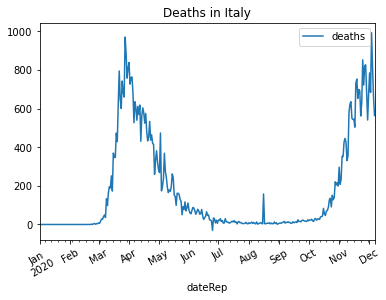

In [12]:
%matplotlib inline
df = pd.read_excel("COVID-19-sample-BDB2021.xlsx")
df2 = df.query('geoId=="IT" and year==2020').iloc[::-1]
df2.plot(x="dateRep", y=["deaths"], title="Deaths in Italy", rot=30)

### Grouping data
We can easily group data with the _groupby()_ function. Let's plot all the COVID-19 cases aggregated by continent.

<AxesSubplot:xlabel='continentExp'>

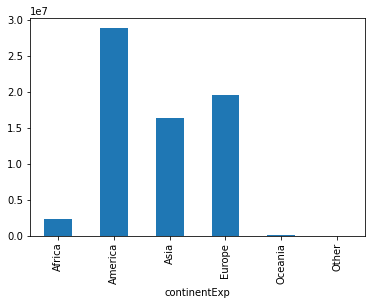

In [13]:
df_continent = df.groupby("continentExp")["cases"].sum()
df_continent.plot(kind="bar")

## Export data to an .xlsx file
We will use the pandas _to_excel()_ function, but we __must__ first install the _openpyxl_ software. We will do it directly from the notebook with the _pip install_ command.
<br>
In Jupyter, lines starting with the _!_ character will be executed in the underlying operating system. In our case, the <code>! pip install openpyxl</code> line will be executed in the Jupyter container.
<br>
Note that in this case the installation of _openpyxl_ will __not__ be permanent, i.e. it will need to reinstalled in case the container is restarted.
<br><br>
If you __do not__ have _openpyxl_ installed, you will get the following error:

In [14]:
df = pd.read_excel("COVID-19-sample-BDB2021.xlsx").query('geoId=="IT"')
df.to_excel("COVID-19-italy-only.xlsx")

ModuleNotFoundError: No module named 'openpyxl'

### Install openpyxl

In [15]:
! pip install openpyxl

  Using cached openpyxl-3.0.5-py2.py3-none-any.whl (242 kB)


### Export the data frame to .xlsx
Now that we have _openpyxl_ installed, we can succesfully call the _to_excel()_ function:

In [16]:
df = pd.read_excel("COVID-19-sample-BDB2021.xlsx").query('geoId=="IT"')
df.to_excel("COVID-19-italy-only.xlsx")

Check that the file has been created looking at the Jupyter file system with the ! command:

In [17]:
! ls -l COVID-19-italy-only.xlsx

-rw-r--r-- 1 jovyan users 26559 Dec 12 13:29 COVID-19-italy-only.xlsx


You should also see the file directly on your system (refer to the course slides).